# Tarea Final Pandas
Nombre: Angélica María Angarita Leal  
Código: 2200801

A lo largo de este código se desarrollarán las herramientas necesarias para realizar un análisis ciertas mediciones recogidas en una casa ubicada en Sceaux (7km de París, Fracia) a lo largo de 11 meses (entre enero y noviembre de 2010).

Estas mediciones son correpondientes a voltaje, intensidad y potencia activa/reactiva. Además de a partir de estos se puede obtener la energía activa/reactiva consumida en cada minuto.

In [1]:
# Importar las librerías necesarias

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit 
from mpl_toolkits.mplot3d import Axes3D # Graficar las regresiones de dos variables independientes
import matplotlib as mpl

In [2]:
# Se importan los documentos que contienen los datos y se agregan las columnas de energia activa/reactiva
# Parse_dates ayuda a que pandas reconozca el formato fecha

dat1=pd.read_csv('Voltage.csv', parse_dates =["Datetime"])

dat2=pd.read_csv('Global_active_power.csv', parse_dates =["Datetime"])
dat2['Energía_activa']=dat2['Global_active_power']*1000/60 #Energía Activa

dat3=pd.read_csv('Global_reactive_power.csv', parse_dates =["Datetime"])
dat3['Energía_reactiva']=dat3['Global_reactive_power']*1000/60  #Energía Reactiva

dat4=pd.read_csv('Global_intensity.csv', parse_dates =["Datetime"])

# 1. Datos

## Minutos

In [3]:
# Se unen los archivos para obtener un solo documento con todos los datos
# Se coloca la columna fecha-tiempo como índice

data = pd.merge(dat1, dat2).merge(dat3).merge(dat4).set_index('Datetime')
data

,Voltage,Global_active_power,Energía_activa,Global_reactive_power,Energía_reactiva,Global_intensity
Datetime,,,,,,
2010-01-01 00:00:00,240.65,1.790,29.833333,0.236,3.933333,7.4
2010-01-01 00:01:00,240.07,1.780,29.666667,0.234,3.900000,7.4
2010-01-01 00:02:00,240.15,1.780,29.666667,0.234,3.900000,7.4
2010-01-01 00:03:00,240.26,1.746,29.100000,0.186,3.100000,7.2
2010-01-01 00:04:00,240.12,1.686,28.100000,0.102,1.700000,7.0
...,...,...,...,...,...,...
2010-11-26 20:58:00,240.43,0.946,15.766667,0.000,0.000000,4.0
2010-11-26 20:59:00,240.00,0.944,15.733333,0.000,0.000000,4.0
2010-11-26 21:00:00,239.82,0.938,15.633333,0.000,0.000000,3.8


Ahora se realizará un 'resample', es decir, se organizarán los datos en una frecuencia dada, en este caso en días y meses.
Además, para esto se usó hallar el promedio de estos datos.

Cuando se realizó el 'resample' para los días, ciertos filas salieron como datos no numéricos ya que esos días no se encontraban en los datos. Para no generar incovenientes más adelante con esos datos se uso .dropna() para eliminarlos.

## Días

In [4]:
# dropna() para eliminar los valores NaN.

dataday = data.resample('D').mean().dropna()
dataday

,Voltage,Global_active_power,Energía_activa,Global_reactive_power,Energía_reactiva,Global_intensity
Datetime,,,,,,
2010-01-01,242.565722,0.850175,14.169583,0.114817,1.913611,3.537083
2010-01-02,243.631743,1.176235,19.603912,0.086656,1.444259,4.857778
2010-01-03,241.822778,0.901894,15.031574,0.090331,1.505509,3.757778
2010-01-04,241.754160,1.171833,19.530556,0.100322,1.672037,4.879028
2010-01-05,240.647167,0.916776,15.279606,0.133697,2.228287,3.929861
...,...,...,...,...,...,...
2010-12-07,240.218646,0.770538,12.842292,0.198550,3.309167,3.397222
2010-12-08,240.794931,0.367846,6.130764,0.117429,1.957153,1.623750
2010-12-09,241.619722,1.119508,18.658472,0.139832,2.330532,4.755694


## Meses

In [5]:
datamonth = data.resample('M').mean()
datamonth

,Voltage,Global_active_power,Energía_activa,Global_reactive_power,Energía_reactiva,Global_intensity
Datetime,,,,,,
2010-01-31,242.338522,1.300640,21.677331,0.125182,2.086373,5.430332
2010-02-28,242.002101,1.157539,19.292318,0.109467,1.824454,4.836624
2010-03-31,241.475284,1.170015,19.500253,0.136368,2.272799,4.920399
2010-04-30,241.442527,1.036334,17.272231,0.129557,2.159277,4.363496
2010-05-31,241.296151,1.075957,17.932616,0.127221,2.120352,4.551504
2010-06-30,240.888985,0.975306,16.255103,0.145525,2.425413,4.170282
2010-07-31,240.965167,0.778947,12.982456,0.138093,2.301543,3.337202
2010-08-31,241.422944,0.929452,15.490873,0.130815,2.180258,3.954423
2010-09-30,241.267517,0.997541,16.625686,0.127700,2.128338,4.223837


# 2. Regresiones

Se modelan las relaciones entre los datos a partir de ecuaciones. En este caso se van a analizar las relaciones más simples:

**1. Ecuación lineal simple (1 variable independiente)**
![Ecuación_lineal_simple](https://latex.codecogs.com/png.latex?F%28x%29%3Da%5Ccdot%20x%20&plus;b)

**2. Ecuación lineal multivariable (2 variables independientes)**
![Ecuación_lineal_multivariable](https://latex.codecogs.com/png.latex?F%28x%29%3Da%5Ccdot%20x%20&plus;b%5Ccdot%20y&plus;c)

**3. Ecuación cuadrática**
![Ecuación_cuadrática](https://latex.codecogs.com/png.latex?F%28x%29%3Da%5Ccdot%20x%5E2%20&plus;b%5Ccdot%20x&plus;c)

Se definen como funciones las relaciones mostradas anteriormente:

In [6]:
# Ecuación lineal simple
def lineal1(x, a, b):
    return a*x+b

# Ecuación lineal multivariable
def lineal2(X, a, b, c):
    x,y = X
    return a*x+b*y+c

# Ecuación cuadrática
def cuadratica1(x, a, b, c):
    return a*(x**2)+b*x+c

Para esta parte de hallar las relaciones para cada grupo de datos, se usó una función que contiene a su vez dos diferentes funciones ya que se divide en si relación requerida tiene 1 o 2 variables independientes.

Cada una de esas funciones también contiene otras tres funciones que permiten hallar las relaciones para los cojuntos dados por los minutos, días y meses. De esta manera se obtiene la comparación de estos ajustes para cada grupo de datos.

In [7]:
# MINUTOS
def regresion1(func,xdat,ydat,r):
    
    # Hallar los coeficientes del ajuste y sus respectivos errores
    popt, pcov = curve_fit(func, data[xdat], data[ydat])
    popt1, pcov1 = np.around(popt,r), np.around(np.sqrt(np.diag(pcov)),r)
    x=np.linspace(data[xdat].min(),data[xdat].max(),100)
    plt.subplot(131)
    
    # Para graficar la línea de ajuste
    plt.plot(x, func(x, *popt), color='indigo',
             label=r'fit: {}$\pm${}'.format(np.around(tuple(popt1),r),tuple(pcov1)))
    
    # Graficar los datos entregados
    plt.scatter(data[xdat],data[ydat], color='cadetblue', label='Original data')
    plt.xlabel(xdat)
    plt.ylabel(ydat)
    plt.legend()
    plt.title('Minutos')
    
    # Hallar el valor de error para el ajuste realizado
    E=np.sqrt(np.mean((data[ydat]-func(data[xdat], *popt))**2))
    
    # Valores obtenidos
    print('Error on fit "Minutos" ={}'.format(E))
    print('Coeficients "Minutos" : {}'.format(popt1))
    print('Sigma_Coeficients "Minutos" : {}'.format(pcov1))
    return 

In [8]:
# DÍAS
def regresion2(func,xdat,ydat,r):
    
    popt, pcov = curve_fit(func, dataday[xdat], dataday[ydat])
    popt1, pcov1 = np.around(popt,r), np.around(np.sqrt(np.diag(pcov)),r)
    x=np.linspace(dataday[xdat].min(),dataday[xdat].max(),100)
    plt.subplot(132)
    
    plt.plot(x, func(x, *popt), color='indigo',
             label=r'fit: {}$\pm${}'.format(np.around(tuple(popt1),r),tuple(pcov1)))
    
    plt.scatter(dataday[xdat],dataday[ydat], color='cadetblue',label='Original data')
    plt.xlabel(xdat)
    plt.ylabel(ydat)
    plt.legend()
    plt.title('Días')
    
    E=np.sqrt(np.mean((dataday[ydat]-func(dataday[xdat], *popt))**2))
    
    print('Error on fit "Días" ={}'.format(E))
    print('Coeficients "Días" : {}'.format(popt1))
    print('Sigma_Coeficients "Días" : {}'.format(pcov1))
    return 

In [9]:
# MESES
def regresion3(func,xdat,ydat,r):
    
    popt, pcov = curve_fit(func, datamonth[xdat], datamonth[ydat])
    popt1, pcov1 = np.around(popt,r), np.around(np.sqrt(np.diag(pcov)),r)
    x=np.linspace(datamonth[xdat].min(),datamonth[xdat].max(),100)
    plt.subplot(133)
    
    plt.plot(x, func(x, *popt), color='indigo',
             label=r'fit: {}$\pm${}'.format(np.around(tuple(popt1),r),tuple(pcov1)))
    
    plt.scatter(datamonth[xdat],datamonth[ydat], color='cadetblue',label='Original data')
    plt.xlabel(xdat)
    plt.ylabel(ydat)
    plt.legend()
    plt.title('Meses')
    
    E=np.sqrt(np.mean((datamonth[ydat]-func(datamonth[xdat], *popt))**2))
    
    print('Error on fit "Meses" ={}'.format(E))
    print('Coeficients "Meses" : {}'.format(popt1))
    print('Sigma_Coeficients "Meses" : {}'.format(pcov1))
    return 

### Regresión para relaciones de una variable independiente

In [10]:
def regresion(func,xdat,ydat,r):
    """
    Esta función calcula el ajuste adecuado para los grupos de datos necesitados, en este caso es una variable independiente. 
    Los coeficientes y respectivos errores de esos coeficientes. Además de el error del mismo ajuste respecto a lo datos.
    Se halla el ajuste para los datos en minutos, días y meses.
    
    Params:
    func:
        Ecuación por la cual se hace la relación.
    
    xdat:
        Variable independiente. Nombre de la categoría, se debe escribir entre comillas simples ''.
    
    ydat:
        Variable dependiente. Nombre de la categoría, se debe escribir entre comillas simples ''.
        
    r:
        Valor para el cual se quiere redondear el resultado, es decir, número de decimales que se quiere tener.
    
    Returns:
    Valores de los coeficientes y sus respectivos errores, y el valor de error del ajuste. 
    Gráficas de los datos con su respectivo ajuste en ellas.
    """   
    plt.figure(figsize=(18,6))
    regresion1(func,xdat,ydat,r)
    regresion2(func,xdat,ydat,r)
    regresion3(func,xdat,ydat,r)
    plt.show()

In [11]:
# MINUTOS
def relacion1(func,X,zdat,r):
    
    # Para obtener una función más sencilla, se toma la variable X como la unión de las dos variables independientes
    xdat=X[0]
    xdat=X[0]
    ydat=X[1]
    fig = plt.figure(figsize=plt.figaspect(0.5))
    ax = fig.add_subplot(projection='3d')
    
    # Hallar los coeficientes del ajuste y sus respectivos errores
    popt, pcov = curve_fit(func, (data[xdat], data[ydat]), data[zdat])
    popt1, pcov1 = np.around(popt,r), np.around(np.sqrt(np.diag(pcov)),r)
    
    # Para graficar el ajuste
    rangex = [(data[xdat].min()), (data[xdat].max()), 100]
    rangey = [(data[ydat].min()), (data[ydat].max()), 100]
    x=np.linspace(*rangex)
    y=np.linspace(*rangey)
    xx, yy =np.meshgrid(x,y)
    ax.plot_surface(xx, yy, func((xx, yy), *popt),cmap='twilight',alpha=0.7)
    
    # Graficar los datos entregados
    c = ax.scatter(data[xdat], data[ydat], data[zdat], color='dimgray')
    
    # Personalización
    ax.set_xlabel(xdat)
    ax.set_ylabel(ydat)
    ax.set_zlabel(zdat)
    plt.title('Minutos')
    legends = mpl.lines.Line2D([0],[0], linestyle="none", color='mediumpurple', marker = '*') 
    ax.legend([legends,c], ['Superficie de ajuste','Datos'], numpoints = 1)
    
    # Hallar el valor de error para el ajuste realizado
    E=np.sqrt(np.mean((data[zdat]-func((data[xdat],data[ydat]), *popt))**2))
    
    # Valores obtenidos
    print('Error on fit "Minutos" ={}'.format(E))
    print('Coeficients "Minutos" : {}'.format(popt1))
    print('Sigma_Coeficients "Minutos" : {}'.format(pcov1))
    return

In [12]:
# DÍAS
def relacion2(func,X,zdat,r):
    
    xdat=X[0]
    ydat=X[1]
    fig = plt.figure(figsize=plt.figaspect(0.5))
    ax = fig.add_subplot(projection='3d')
    
    popt, pcov = curve_fit(func, (dataday[xdat], dataday[ydat]), dataday[zdat])
    popt1, pcov1 = np.around(popt,r), np.around(np.sqrt(np.diag(pcov)),r)
    
    rangex = [(dataday[xdat].min()), (dataday[xdat].max()), 100]
    rangey = [(dataday[ydat].min()), (dataday[ydat].max()), 100]
    x=np.linspace(*rangex)
    y=np.linspace(*rangey)
    xx, yy =np.meshgrid(x,y)
    ax.plot_surface(xx, yy, func((xx, yy), *popt),cmap='twilight',alpha=0.6)
    
    c = ax.scatter(dataday[xdat], dataday[ydat], dataday[zdat], color='dimgray')
    
    ax.set_xlabel(xdat)
    ax.set_ylabel(ydat)
    ax.set_zlabel(zdat)
    plt.title('Días')
    legends = mpl.lines.Line2D([0],[0], linestyle="none", color='mediumpurple', marker = '*') 
    ax.legend([legends,c], ['Superficie de ajuste','Datos'], numpoints = 1)
    
    E=np.sqrt(np.mean((dataday[zdat]-func((dataday[xdat],dataday[ydat]), *popt))**2))
    
    print('Error on fit "Días" ={}'.format(E))
    print('Coeficients "Días" : {}'.format(popt1))
    print('Sigma_Coeficients "Días" : {}'.format(pcov1))
    return

In [13]:
# MESES
def relacion3(func,X,zdat,r):
    
    xdat=X[0]
    ydat=X[1]
    fig = plt.figure(figsize=plt.figaspect(0.5))
    ax = fig.add_subplot(projection='3d')
    
    popt, pcov = curve_fit(func, (datamonth[xdat], datamonth[ydat]), datamonth[zdat])
    popt1, pcov1 = np.around(popt,r), np.around(np.sqrt(np.diag(pcov)),r)
    
    rangex = [(datamonth[xdat].min()), (datamonth[xdat].max()), len(datamonth[xdat])]
    rangey = [(datamonth[ydat].min()), (datamonth[ydat].max()), len(datamonth[ydat])]
    x=np.linspace(*rangex)
    y=np.linspace(*rangey)
    xx, yy =np.meshgrid(x,y)
    ax.plot_surface(xx, yy, func((xx, yy), *popt),cmap='twilight',alpha=0.5)
    
    c = ax.scatter(datamonth[xdat], datamonth[ydat], datamonth[zdat], color='black')
    
    ax.set_xlabel(xdat)
    ax.set_ylabel(ydat)
    ax.set_zlabel(zdat)
    plt.title('Meses')
    legends = mpl.lines.Line2D([0],[0], linestyle="none", color='mediumpurple', marker = '*') 
    ax.legend([legends,c], ['Superficie de ajuste','Datos'], numpoints = 1)
    
    E=np.sqrt(np.mean((datamonth[zdat]-func((datamonth[xdat],datamonth[ydat]), *popt))**2))
    
    print('Error on fit "Meses" ={}'.format(E))
    print('Coeficients "Meses" : {}'.format(popt1))
    print('Sigma_Coeficients "Meses" : {}'.format(pcov1))
    return

### Regresión para relaciones de dos variables independientes

In [14]:
def relacion(func,X,zdat,r):
    """
    Esta función calcula el ajuste adecuado para los grupos de datos necesitados, en este caso es una variable independiente. 
    Los coeficientes y respectivos errores de esos coeficientes. Además de el error del mismo ajuste respecto a lo datos.
    Se halla el ajuste para los datos en minutos, días y meses.
    
    Params:
    func:
        Ecuación por la cual se hace la relación.
    
    X:
        Variables independientes.Este valor corresponde a las dos categorías.
        Se deben escribir entre paréntesis, cada uno con sus comillas y separados por una coma ('','')
    
    zdat:
        Variable dependiente. Nombre de la categoría, se debe escribir entre comillas simples ''.
        
    r:
        Valor para el cual se quiere redondear el resultado, es decir, número de decimales que se quiere tener.
    
    Returns:
    Valores de los coeficientes y sus respectivos errores, y el valor de error del ajuste. 
    Gráficas de los datos con su respectivo ajuste en ellas.
    """   
    relacion1(func,X,zdat,r)
    relacion2(func,X,zdat,r)
    relacion3(func,X,zdat,r)
    plt.show()

## Función principal para realizar los ajustes

In [15]:
def regresiones(func,u,v,r):
    """
    Esta función calcula el ajuste adecuado para los grupos de datos necesitados, en este caso es una variable independiente. 
    Los coeficientes y respectivos errores de esos coeficientes. Además de el error del mismo ajuste respecto a lo datos.
    Se halla el ajuste para los datos en minutos, días y meses.
    
    Params:
    func:
        Ecuación por la cual se hace la relación.
    
    u:
        Variable(s) independiente(s).Este valor corresponde al nombre de la categoria(s).
        Se deben escribir entre paréntesis si es una función con dos variables independientes,
        cada uno con sus comillas y separados por una coma ('',''). Sino, escribirlo entre comillas simples ''.
    
    v:
        Variable dependiente. Nombre de la categoría, se debe escribir entre comillas simples ''.
        
    r:
        Valor para el cual se quiere redondear el resultado, es decir, número de decimales que se quiere tener.
    
    Returns:
    Valores de los coeficientes y sus respectivos errores, y el valor de error del ajuste. 
    Gráficas de los datos con su respectivo ajuste en ellas.
    """   
    if func==lineal2:
        relacion(func,u,v,r)
    else:
        regresion(func,u,v,r)

## Ejemplos

Se van a realizar las siguientes relaciones, para ejemplificar las regresiones y realizar un análisis sobre los datos que se obtengan.

| N° | Variable Independiente | 1 Variable Dependiente | 2 Variable Dependiente |          Relación          |
|:--:|:----------------------:|:----------------------:|:----------------------:|:--------------------------:|
|  1 |   Global_active_power  |    Global_intensity    |                        | Lineal Simple / Cuadrática |
|  2 |   Global_active_power  |         Voltage        |                        | Lineal Simple / Cuadrática |
|  3 |   Global_active_power  |    Global_intensity    |          Voltage       |    Lineal Multivariable    |

Error on fit "Minutos" =0.04925499323758366
Coeficients "Minutos" : [ 0.238 -0.005]
Sigma_Coeficients "Minutos" : [0. 0.]
Error on fit "Días" =0.015224732467354674
Coeficients "Días" : [ 0.243 -0.028]
Sigma_Coeficients "Días" : [0.001 0.003]
Error on fit "Meses" =0.004125583875027927
Coeficients "Meses" : [ 0.25  -0.061]
Sigma_Coeficients "Meses" : [0.003 0.012]


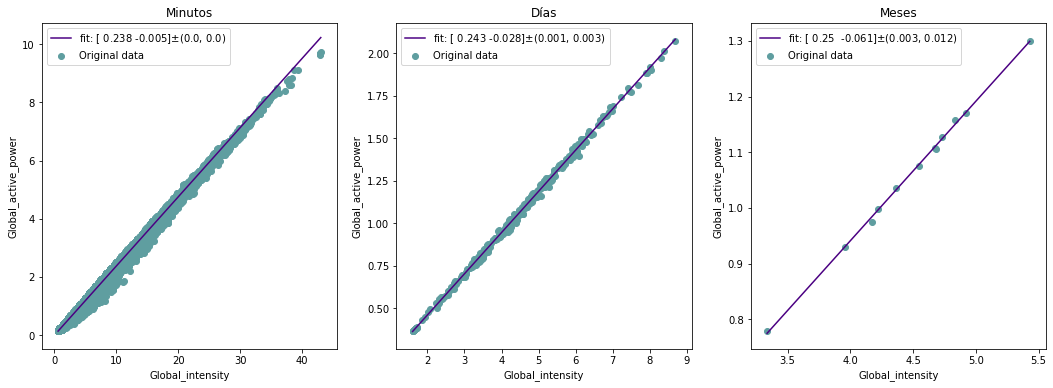

In [16]:
# 1.1 Lineal
regresiones(lineal1, 'Global_intensity', 'Global_active_power',3)

Error on fit "Minutos" =0.0480901268988135
Coeficients "Minutos" : [-0.     0.244 -0.018]
Sigma_Coeficients "Minutos" : [0. 0. 0.]
Error on fit "Días" =0.015220392899736354
Coeficients "Días" : [-0.     0.244 -0.03 ]
Sigma_Coeficients "Días" : [0.    0.003 0.006]
Error on fit "Meses" =0.003899406009207069
Coeficients "Meses" : [0.004 0.219 0.007]
Sigma_Coeficients "Meses" : [0.003 0.03  0.066]


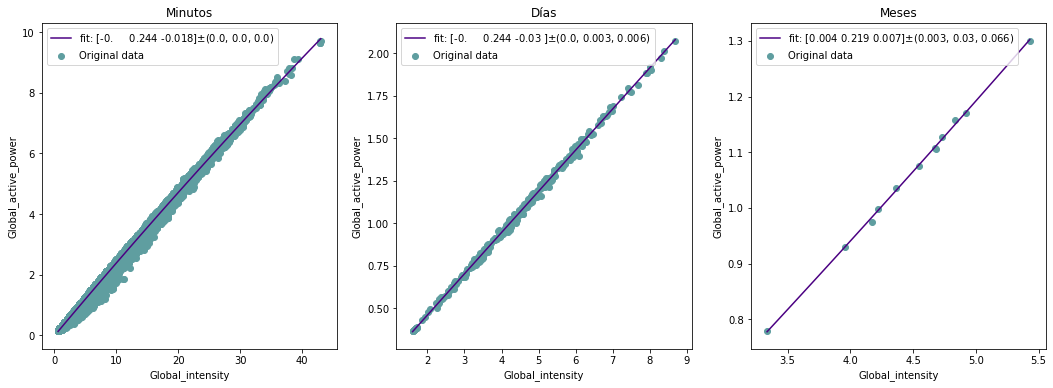

In [17]:
# 1.2 Cuadrática
regresiones(cuadratica1, 'Global_intensity', 'Global_active_power',3)

Error on fit "Minutos" =0.8487935137294275
Coeficients "Minutos" : [-0.136 33.874]
Sigma_Coeficients "Minutos" : [0.    0.106]
Error on fit "Días" =0.34128269795840077
Coeficients "Días" : [ 0.03  -6.102]
Sigma_Coeficients "Días" : [0.012 2.989]
Error on fit "Meses" =0.09452198916921928
Coeficients "Meses" : [  0.173 -40.671]
Sigma_Coeficients "Meses" : [ 0.06  14.478]


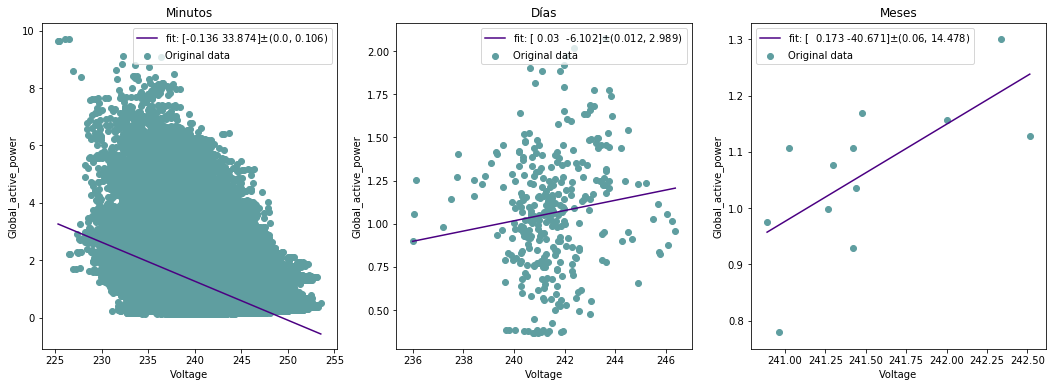

In [18]:
# 2.1 Lineal
regresiones(lineal1, 'Voltage', 'Global_active_power',3)

Error on fit "Minutos" =0.835802901119243
Coeficients "Minutos" : [ 1.10000e-02 -5.35400e+00  6.63627e+02]
Sigma_Coeficients "Minutos" : [0.    0.044 5.262]
Error on fit "Días" =0.340683256352272
Coeficients "Días" : [ 4.00000e-03 -2.05500e+00  2.45718e+02]
Sigma_Coeficients "Días" : [4.00000e-03 1.96300e+00 2.37209e+02]
Error on fit "Meses" =0.09150773355891864
Coeficients "Meses" : [-1.020000e-01  4.956300e+01 -6.009676e+03]
Sigma_Coeficients "Meses" : [1.320000e-01 6.370000e+01 7.698405e+03]


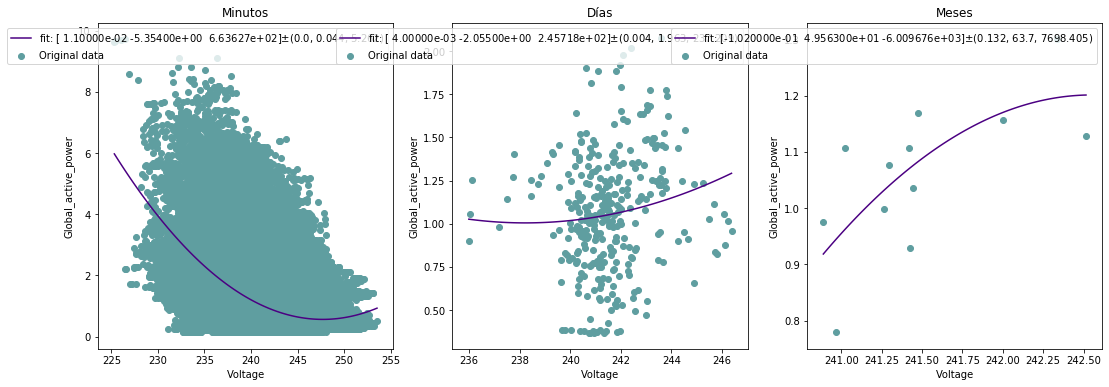

In [19]:
# 2.2 Cuadrática
regresiones(cuadratica1, 'Voltage', 'Global_active_power',3)

Error on fit "Minutos" =0.04776192256518158
Coeficients "Minutos" : [ 0.239  0.005 -1.139]
Sigma_Coeficients "Minutos" : [0.    0.    0.007]
Error on fit "Días" =0.011938888071503432
Coeficients "Días" : [ 0.242  0.006 -1.515]
Sigma_Coeficients "Días" : [0.    0.    0.105]
Error on fit "Meses" =0.0027880713571015515
Coeficients "Meses" : [ 0.245  0.008 -1.989]
Sigma_Coeficients "Meses" : [0.002 0.002 0.589]


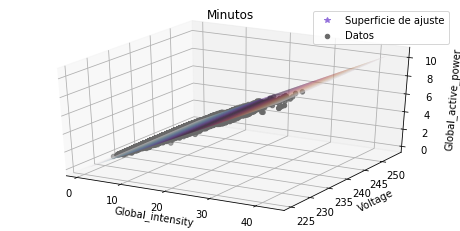

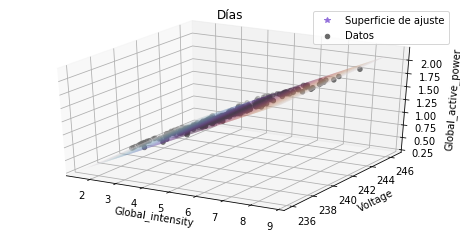

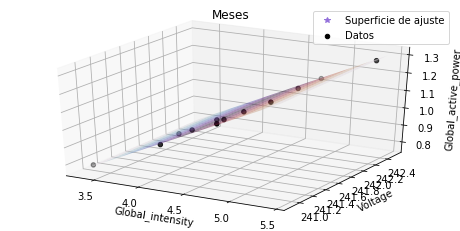

In [20]:
# 3. Lineal Multivariable
regresiones(lineal2, ('Global_intensity','Voltage'), 'Global_active_power',3)

### Conclusiones

Realizando un balance general de todos los resultados, se observó que los menores valores de error para loa ajustes son los de el grupo de datos 'meses', a pesar de esto este mismo grupo de datos es quien obtuvo el mayor valor de sigma de los coeficientes, es decir, presentan mayor desviación en los parámetros.

**RELACIÓN 1: 'Global_intensity', 'Global_active_power'**

| Relación 1 | Minutos | Días  | Meses |
|------------|---------|-------|-------|
| Lineal     | 0.049   | 0.015 | 0.004 |
| Cuadrática | 0.048   | 0.015 | 0.003 |

Para la primera relación se obtuvo mejor ajuste cuando se uso la ecuación lineal, aunque la diferencia de error del ajuste respecto a la cuadrática no es tan significante. Además, el valor de los sigmas también fue más bajo con el ajuste de la ecuación lineal. A partir de esto, se puede concluir que el ajuste más adecuado para estos datos es con la función lineal.

**RELACIÓN 2: 'Voltage', 'Global_active_power'**

| Relación 2 | Minutos | Días  | Meses |
|------------|---------|-------|-------|
| Lineal     | 0.848   | 0.341 | 0.094 |
| Cuadrática | 0.835   | 0.340 | 0.091 |

En esta segunda relación se observa que el menor valor para los erroress se encuentra en el ajuste por medio de la cuadrática. Aunque estos valores solo difieren del lineal por muy poco. En los valores de los sigmas si podemos ver una gran diferencia, ya que para el ajuste cuadrático ciertos errores en los parámetros son bastante elevados. De esto se puede concluir que el ajuste más pertinente para este caso también sería el lineal. Cabe resaltar que estos datos, no se les podía observar una clara relación.

**RELACIÓN 3: 'Voltage', 'Global_intensity', 'Global_active_power'**

| Relación 3    | Minutos | Días  | Meses |
|---------------|---------|-------|-------|
| Multivariable | 0.047   | 0.011 | 0.002 |

Como se dijo anteriormente los menores valores de error en los ajustes se presentaron en el grupo de datos correpondiente a 'Meses'. Pero el menor valor de desviación de los coeficientes se presenta en el grupo de 'Minutos'.